In [104]:
# import numpy as np
# import pandas as pd

# df = pd.read_csv('')
# df = pd.read_csv('')
# df = pd.read_csv('')
# df = pd.read_csv('')
# df = pd.read_csv('')

#몰까 encoding="cp949"? 폰트지정도잇으시군

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import platform
import os
import glob

pd.set_option('display.float_format',"{:.2f}".format)

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

file_path = "2024.csv"
df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])

C:\Users\user\AppData\Local\Temp\ipykernel_5984\3187018174.py:23: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])


In [106]:
df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11380,은평구,10200,녹번동,1.00,대지,86.00,125.00,성원빌라(86-125),...,16400,53.07,25.00,4.00,NaN,NaT,1991.00,연립다세대,중개거래,서울 은평구
1,2024,11500,강서구,10300,화곡동,1.00,대지,924.00,4.00,팔팔빌라,...,35000,39.24,27.00,2.00,NaN,NaT,1986.00,연립다세대,직거래,NaN
2,2024,11560,영등포구,11100,당산동1가,1.00,대지,143.00,0.00,다솔시티하임,...,30000,29.54,14.00,5.00,NaN,NaT,2017.00,연립다세대,직거래,NaN
3,2024,11560,영등포구,12800,양평동4가,1.00,대지,220.00,0.00,해울빌,...,36000,40.41,63.64,3.00,NaN,NaT,2021.00,오피스텔,중개거래,서울 용산구
4,2024,11410,서대문구,11200,대현동,1.00,대지,90.00,77.00,유씨유 이대,...,19300,17.31,30.87,5.00,NaN,NaT,2018.00,오피스텔,중개거래,서울 서대문구


In [107]:
df.head().T #T를 넣으면 세워짐

,0,1,2,3,4
접수연도,2024,2024,2024,2024,2024
자치구코드,11380,11500,11560,11560,11410
자치구명,은평구,강서구,영등포구,영등포구,서대문구
법정동코드,10200,10300,11100,12800,11200
법정동명,녹번동,화곡동,당산동1가,양평동4가,대현동
지번구분,1.00,1.00,1.00,1.00,1.00
지번구분명,대지,대지,대지,대지,대지
본번,86.00,924.00,143.00,220.00,90.00
부번,125.00,4.00,0.00,0.00,77.00
건물명,성원빌라(86-125),팔팔빌라,다솔시티하임,해울빌,유씨유 이대


In [108]:
df.shape

(77523, 21)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77523 entries, 0 to 77522
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   접수연도              77523 non-null  int64         
 1   자치구코드             77523 non-null  int64         
 2   자치구명              77522 non-null  object        
 3   법정동코드             77523 non-null  int64         
 4   법정동명              77523 non-null  object        
 5   지번구분              74965 non-null  float64       
 6   지번구분명             74965 non-null  object        
 7   본번                74964 non-null  object        
 8   부번                74964 non-null  object        
 9   건물명               74964 non-null  object        
 10  계약일               77523 non-null  datetime64[ns]
 11  물건금액(만원)          77523 non-null  int64         
 12  건물면적(㎡)           77523 non-null  float64       
 13  토지면적(㎡)           72446 non-null  float64       
 14  층                 7496

In [110]:
df.describe().round()

,접수연도,자치구코드,법정동코드,지번구분,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,77523.00,77523.00,77523.00,74965.00,77523,77523.00,77523.00,72446.00,74965.00,3172,77256.00
mean,2024.00,11456.00,10949.00,1.00,2024-05-24 23:35:51.139661824,88599.00,68.00,19.00,8.00,2024-06-15 19:38:30.718789120,1987.00
min,2024.00,11110.00,10100.00,1.00,2021-02-08 00:00:00,2600.00,8.00,0.00,-2.00,2024-01-02 00:00:00,0.00
25%,2024.00,11305.00,10200.00,1.00,2024-03-27 00:00:00,32000.00,42.00,0.00,3.00,2024-04-23 00:00:00,1996.00
50%,2024.00,11470.00,10600.00,1.00,2024-06-05 00:00:00,66000.00,60.00,0.00,6.00,2024-06-24 00:00:00,2004.00
75%,2024.00,11620.00,11000.00,1.00,2024-07-24 00:00:00,115000.00,85.00,27.00,11.00,2024-08-17 00:00:00,2016.00
max,2024.00,26230.00,18700.00,3.00,2024-10-14 00:00:00,2850000.00,2932.00,30822.00,68.00,2024-10-14 00:00:00,2024.00
std,0.00,186.00,1228.00,0.00,NaN,87196.00,53.00,122.00,6.00,NaN,190.00


In [111]:
df.isnull().sum()

접수연도                    0
자치구코드                   0
자치구명                    1
법정동코드                   0
법정동명                    0
지번구분                 2558
지번구분명                2558
본번                   2559
부번                   2559
건물명                  2559
계약일                     0
물건금액(만원)                0
건물면적(㎡)                 0
토지면적(㎡)              5077
층                    2558
권리구분                76823
취소일                 74351
건축년도                  267
건물용도                    0
신고구분                    2
신고한 개업공인중개사 시군구명     8854
dtype: int64

## 실습 1. 숫자형 컬럼을 데이터 유형별로 나누기

---

### 실습 조건
- **연도(year)에 해당하는 컬럼은 본 실습에서 제외한다**
- 연도 컬럼은 분석 목적에 따라 양적·질적으로 다르게 해석될 수 있으므로,
  본 실습에서는 데이터 유형 분류 대상에서 제외한다

---

### 1. 양적 데이터 (Quantitative Data)

숫자로 측정할 수 있으며, **크기·차이·연산**이 의미 있는 데이터

| 구분 | 설명 | 예시 |
|---|---|---|
| 연속형 (Continuous) | 측정 가능한 실수 값 | 키, 몸무게, 온도, 시간 |
| 이산형 (Discrete) | 측정 가능한 정수 값 | 구매 횟수, 방문자 수, 자녀 수 |

---

### 2. 질적 데이터 (Qualitative Data)

대상을 **특성·범주·종류**로 구분하는 데이터  
(숫자로 표현될 수 있으나, 산술 연산은 의미 없음)

| 구분 | 설명 | 예시 |
|---|---|---|
| 명목형 (Nominal) | 순서가 없는 범주 | 성별, 혈액형, 국가 |
| 순서형 (Ordinal) | 순서는 있으나 간격의 크기는 의미 없음 | 만족도, 선호도 순위, 등급 |

In [112]:
numberic_df = df.select_dtypes(include='number')
numberic_df #숫자형만 뽑은~


,접수연도,자치구코드,법정동코드,지번구분,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도
0,2024,11380,10200,1.00,16400,53.07,25.00,4.00,1991.00
1,2024,11500,10300,1.00,35000,39.24,27.00,2.00,1986.00
2,2024,11560,11100,1.00,30000,29.54,14.00,5.00,2017.00
3,2024,11560,12800,1.00,36000,40.41,63.64,3.00,2021.00
4,2024,11410,11200,1.00,19300,17.31,30.87,5.00,2018.00
...,...,...,...,...,...,...,...,...,...
77518,2024,11530,10700,1.00,9190,53.61,124.00,1.00,1981.00
77519,2024,11530,10700,1.00,9190,53.61,124.00,1.00,1981.00
77520,2024,11530,10700,1.00,9740,53.61,124.00,2.00,1981.00
77521,2024,11440,11000,NaN,195000,157.45,116.70,NaN,1988.00


In [113]:
numberic_df = numberic_df.drop(columns=['접수연도','건축년도'])


자치구코드 : 명목형?
연도 : 이산형
법정동코드 : 명목형? 순서형?  지번같은거 아닌가? 지번은 규칙대로 그 뭐시기 모퉁이대로 룰? 규칙이 있는데 명목형인듯 코드니까 결국
                                #아... 명언이다 평균을 못 낸다면 그것은 명목형이다
지번구분 : 명목형
물건금액 : 연속형
건물면적 : 연속형
토지면적 : 연속형
층 : 순서형 아; 이산형이야?!

- 아 맞다 처음 배울 때도 준내 틀렸던 기억이 난다
= 근데 소수로 못 계산하면 이산형이라고 했던 것 같음 아; 그때와 성장하지 않은;

In [114]:
## 아 과제하다가
continuous_cols = ['물건금액(만원)', '토지면적(㎡)', '건물면적(㎡)']
conti_df = numberic_df[continuous_cols].copy

In [115]:
# conti_df.describe()

In [116]:
# conti-df.hist()
# plt.show()

In [117]:
# conti-df.hist(conti_df['건물면적', bins=100, edgecolor='black'])
# plt.show()

In [118]:
numeric_df = df.select_dtypes(include='number')
numeric_df.drop(columns=['접수연도','건축년도'],inplace=True)

In [119]:
numeric_df.columns = ['자치구코드', '법정동코드', '지번구분', '물건금액', '건물면적', '토지면적', '층']

In [120]:
numeric_df

,자치구코드,법정동코드,지번구분,물건금액,건물면적,토지면적,층
0,11380,10200,1.00,16400,53.07,25.00,4.00
1,11500,10300,1.00,35000,39.24,27.00,2.00
2,11560,11100,1.00,30000,29.54,14.00,5.00
3,11560,12800,1.00,36000,40.41,63.64,3.00
4,11410,11200,1.00,19300,17.31,30.87,5.00
...,...,...,...,...,...,...,...
77518,11530,10700,1.00,9190,53.61,124.00,1.00
77519,11530,10700,1.00,9190,53.61,124.00,1.00
77520,11530,10700,1.00,9740,53.61,124.00,2.00
77521,11440,11000,NaN,195000,157.45,116.70,NaN


## 기술통계

### 실습2. describe(), histogram 그리기

In [121]:
df.describe()   #요약/통계 보기

#계약일은 연속형, 명목형 때에 따라 달라짐


,접수연도,자치구코드,법정동코드,지번구분,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,77523.00,77523.00,77523.00,74965.00,77523,77523.00,77523.00,72446.00,74965.00,3172,77256.00
mean,2024.00,11456.36,10948.61,1.00,2024-05-24 23:35:51.139661824,88598.66,68.03,18.65,7.89,2024-06-15 19:38:30.718789120,1986.78
min,2024.00,11110.00,10100.00,1.00,2021-02-08 00:00:00,2600.00,8.48,0.00,-2.00,2024-01-02 00:00:00,0.00
25%,2024.00,11305.00,10200.00,1.00,2024-03-27 00:00:00,32000.00,41.85,0.00,3.00,2024-04-23 00:00:00,1996.00
50%,2024.00,11470.00,10600.00,1.00,2024-06-05 00:00:00,66000.00,59.92,0.00,6.00,2024-06-24 00:00:00,2004.00
75%,2024.00,11620.00,11000.00,1.00,2024-07-24 00:00:00,115000.00,84.87,27.00,11.00,2024-08-17 00:00:00,2016.00
max,2024.00,26230.00,18700.00,3.00,2024-10-14 00:00:00,2850000.00,2932.27,30822.00,68.00,2024-10-14 00:00:00,2024.00
std,0.00,186.07,1228.36,0.09,NaN,87195.98,53.12,122.38,6.32,NaN,190.38


In [122]:
continuous_cols =['물건금액','토지면적','건물면적'] #연속형 데이터만 쓸 거임
conti_df = numeric_df[continuous_cols].copy()

In [123]:
conti_df.describe() #연속형 컬럼만 describe 보기

#토지면적 0이다가 724466 있으니까 갑자기 쏫아나겠다~

,물건금액,토지면적,건물면적
count,77523.00,72446.00,77523.00
mean,88598.66,18.65,68.03
std,87195.98,122.38,53.12
min,2600.00,0.00,8.48
25%,32000.00,0.00,41.85
50%,66000.00,0.00,59.92
75%,115000.00,27.00,84.87
max,2850000.00,30822.00,2932.27


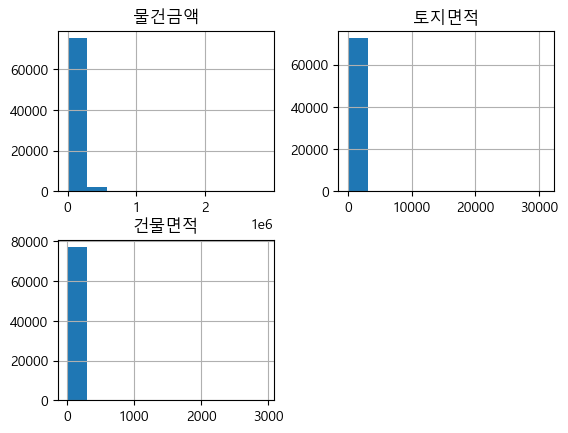

In [124]:
conti_df.hist()
plt.show()

#1e6은 숫자가 너무 길어서 0이 6개 더 붙어있다~보여주는것이로다

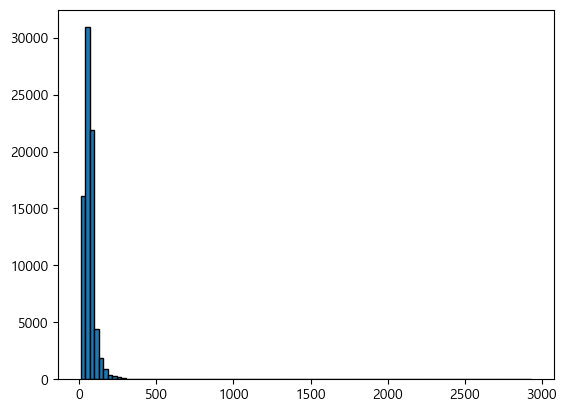

In [125]:
plt.hist(conti_df['건물면적'],bins=100, edgecolor='black')      # bins= 구간 개수  / edgecolor=테두리넣을게
plt.show()

### 실습3. IQR 방식의 이상치 제거

In [126]:
conti_df.describe()

,물건금액,토지면적,건물면적
count,77523.00,72446.00,77523.00
mean,88598.66,18.65,68.03
std,87195.98,122.38,53.12
min,2600.00,0.00,8.48
25%,32000.00,0.00,41.85
50%,66000.00,0.00,59.92
75%,115000.00,27.00,84.87
max,2850000.00,30822.00,2932.27


In [127]:
# IQR 방식의 이상치 제거
area_data = conti_df['토지면적'].dropna().values        #이상치제거먼저해줌 / values = 값들만 가져오겠다
q_1 = np.percentile(area_data, q=25)    # percentile 1단 백분위로 잘라봐 / area_data로 자를 거고 / q는 몇번째 결과의 숫자를 보여줄지인데 25번째. 25%에 해당되는 숫자를 가져와
q_3 = np.percentile(area_data, q=75)    # percentile 백분위(데이터이걸로/q는 몇번째(몇%)가져올건지)
iqr = q_3 - q_1 #IQR : 박스 크기(= Q3 - Q1 )
q_1,q_3,iqr

(np.float64(0.0), np.float64(27.0), np.float64(27.0))

In [128]:
lower_whisker = q_1 - iqr*1.5   # 하한선 : Q1 - 1.5 * IQR : whisker 하단
upper_whisker = q_3 + iqr*1.5   # 상한선 : Q3 + 1.5 * IQR : whisker 상단
conti_df.loc[(conti_df['토지면적']<lower_whisker)|(conti_df['토지면적']>upper_whisker)] # 이상치에 해당하는 애들이 얼마나 되는지
# df['토지면적']이 lower_whisker(하한선)보다 작거나 / df['토지면적']이 upper_whisker(상한선)보다 큰 (=이상치)
# 3680 행이나 있군 (27*1.5 = 45인 이상인 애들이 쭉~)

,물건금액,토지면적,건물면적
5,744000,534.00,1502.31
12,69000,90.00,136.16
64,30000,157.00,194.85
148,185000,154.00,230.41
154,30800,91.00,61.87
...,...,...,...
77518,9190,124.00,53.61
77519,9190,124.00,53.61
77520,9740,124.00,53.61
77521,195000,116.70,157.45


In [129]:
## between 방식도 됨
# df.loc[df['A'].between(lower_whisker,upper_whisker)]

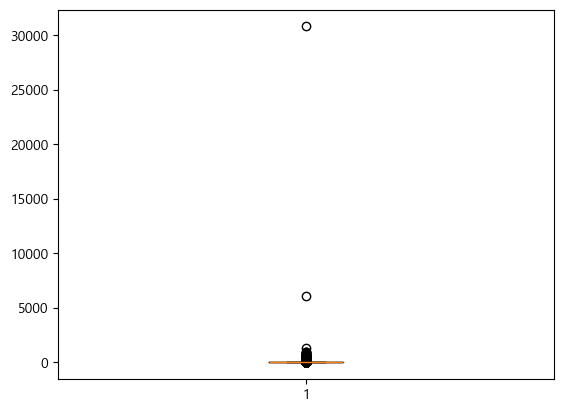

In [130]:
# 박스플롯을 그려봅쉬다
plt.boxplot(area_data)
plt.show()
# 아.. 제거마려워 박스가 안보이잖아요!! 

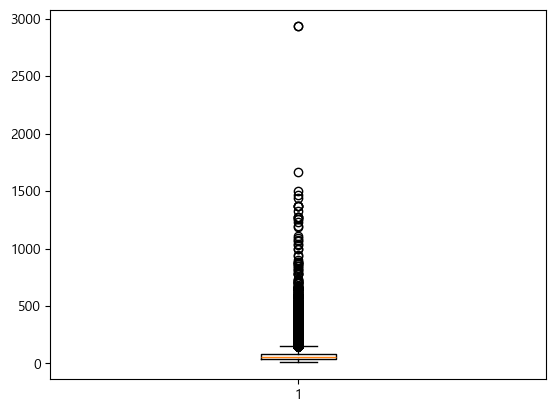

In [131]:
# 좀 더 나은 건물면적으로 
# 박스플롯을 그려봅쉬다
plt.boxplot(conti_df['건물면적'])
plt.show()

In [132]:
#코드가빨리서놓친사람여기요
#버스놓친사람의 허망함
#보기만 ㅎ ㅏ라고 하셨지만.... 난 통계보다 Python으로 보는 코드가 더 어려우니까 보고싶었뜨악

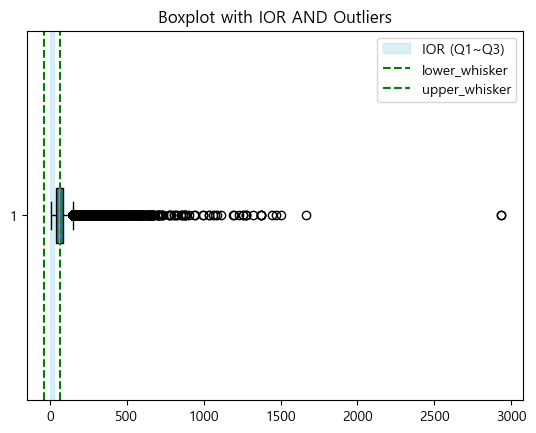

In [133]:
### 노가다 수공업 들어갑니다

#그려보기 심화
plt.boxplot(df['건물면적(㎡)'], vert=False, patch_artist=True, )

# IOR 영역 시각화
plt.axvspan(q_1, q_3, color='skyblue', alpha=0.3, label='IOR (Q1~Q3)')

#수염 경계 표시
plt.axvline(lower_whisker, color='green', linestyle='--', label='lower_whisker')
plt.axvline(upper_whisker, color='green', linestyle='--', label='upper_whisker')


plt.title("Boxplot with IOR AND Outliers")
plt.legend()
plt.show()

#어 위쪽 코드도 수정하셨나봐 아악 그렇군 코드는 동일한데 area_data 내용에 아마 건물면적? 으로 되어있을듯 이상치가 막 그렇게 두드러지지 않는 데이터 바꾸신 듯 하다
#됐다 ㅋ 예상이 맞았군 그냥 데이터 코드만 area_data에서 df['건물면적(㎡)]로 바꿔줌
#약간 다른데 위에서 이상치 IQR 약간 수정하셔서 그런듯 일단 봅시다 코드가 중요한거니까

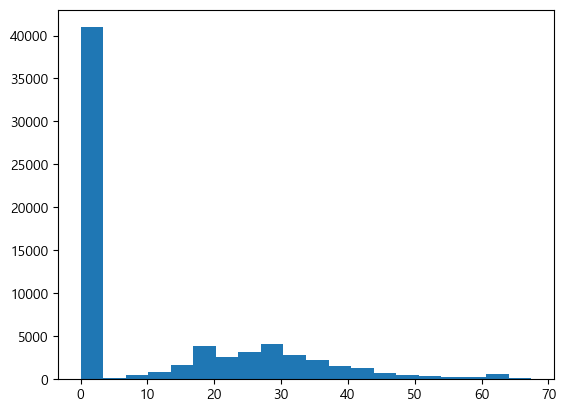

In [134]:
### 아웃라이어가 아닌 걸 보고 싶다~
# 기준 반대로 < > 해주면 됨 (area_data_cleaned)

outliers = conti_df.loc[(conti_df['토지면적']<lower_whisker)|(conti_df['토지면적']>upper_whisker)]
area_data_cleaned = conti_df.loc[(conti_df['토지면적']>=lower_whisker)&(conti_df['토지면적']<=upper_whisker),'토지면적']
plt.hist(area_data_cleaned,bins=20) # 0이 굉장히 많은
plt.show()

(array([7.2444e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  3082.2,  6164.4,  9246.6, 12328.8, 15411. , 18493.2,
        21575.4, 24657.6, 27739.8, 30822. ]),
 <BarContainer object of 10 artists>)

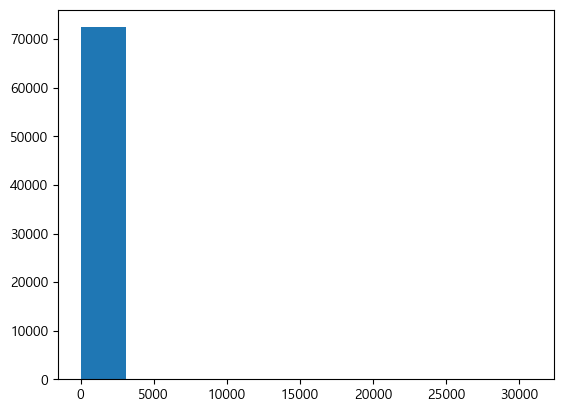

In [135]:
### 아까 해석 불가능하게 뭉개졌던 데이터랑 비교해보면 차이가 확실하지용?
plt.hist(area_data)


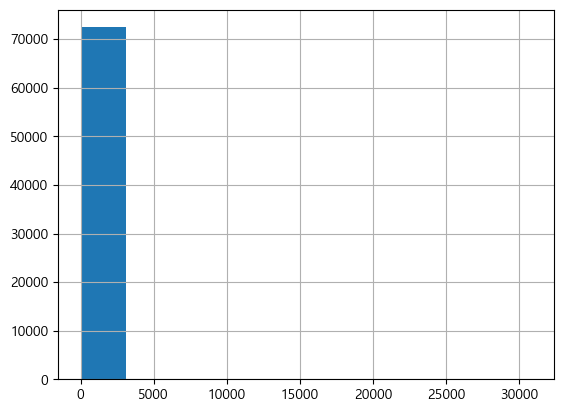

In [136]:
# 요런 방식도
conti_df['토지면적'].hist()
plt.show()

##### 님들은 차이가 뭐예요?
`plt.hist(area_data)` 
- Matplotlib 사용
- 데이터가 list든 array든 상관없이 걍 숫자면 그리셈 ㅇㅇ 
- 세밀한 조정이 가능하지만, 축 이름이나 제목을 우리가 일일이 다 설정해줘야 함..

`conti_df['토지면적'].hist()`

`plt.show()`
- Pandas 내장 기능 사용
- 내부적으로는 Matplotlib 쓰지만? 데이터프레임의 정보(컬럼명이라던지)를 알고 있음
- 알잘딱으로 그려줌


- [추가 차이점]
    - plt.hist()는 그래프뿐만 아니라 각 구간(bin)의 도수와 경계값들을 튜플(Tuple) 형태로 반환함
    - df.hist()는 그래프가 그려지는 Axes(축) 객체를 반환함

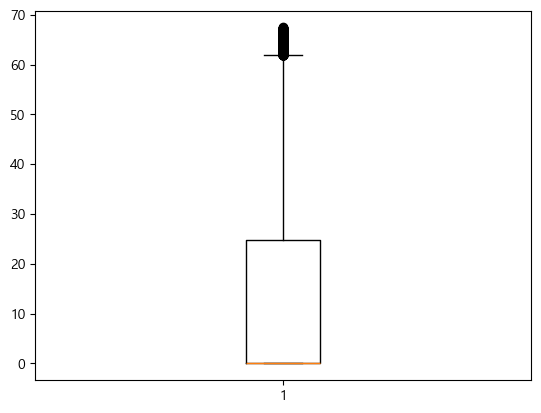

In [137]:
# 이상치 제거한 버전의 boxplot도~
plt.boxplot(area_data_cleaned)
plt.show()

## 추론 통계

In [138]:
# 샘플 만들기                                          #sample : 원래 샘플 데이터는 무작위로 생성함. 
sample_df = conti_df.sample(200,random_state=42)    #random_state : 근데 무작위 선정 방식을 고정함(42로)

#아아 왜 뽑나 했는데 모집단이 우리의 conti_df고, 그 안에서 무작위로 샘플 뽑아서 그게 표본이라고~

### 실습4. 샘플데이터와 전체데이터 비교하기

In [139]:
sample_df.describe()        #너 어케 생겻니~

#그래서? 표본 봤는데 어 mean 토지면적이 21.16이네~ 그럼 얘가 모집단을 대표할 수 있을까?(설명할 수 있을까?)

,물건금액,토지면적,건물면적
count,200.00,188.00,200.00
mean,88368.32,21.16,70.83
std,76123.73,36.15,56.22
min,8000.00,0.00,13.58
25%,33150.00,0.00,46.04
50%,67650.00,0.00,59.93
75%,118000.00,30.25,84.90
max,507000.00,245.00,664.84


In [140]:
conti_df.describe()         #비교해봅시다

#보자~ 안같네요? 근데 비슷하긴 하네요 근데 이걸 더 정확하게 하려면 뭐 구간추정을 하던가 해야겠죠??

,물건금액,토지면적,건물면적
count,77523.00,72446.00,77523.00
mean,88598.66,18.65,68.03
std,87195.98,122.38,53.12
min,2600.00,0.00,8.48
25%,32000.00,0.00,41.85
50%,66000.00,0.00,59.92
75%,115000.00,27.00,84.87
max,2850000.00,30822.00,2932.27


In [141]:
# 21.16일 것이다 모집단의 평균이
# 근데? 18.65다 사실은

#근데? 이 21.16일 것이다 라고 추정하는 게 점추정 / 구간을 제시하면 구간추정
#

In [142]:
### 구간 추정을 위해서 신뢰구간 구하기~~~

### 실습5. 신뢰구간 구하기

In [143]:
sample_data = sample_df['토지면적'] 

#표본 개수 
n = len(sample_data)    # 샘플 데이터의 행개수
#표본의 평균
sample_mean = np.mean(sample_data)  # np.mean으로 평균 구함
#표본의 표준편차
s = np.std(sample_data,ddof=1)  # np.std로 표준편차 구하기 / # ddof=1 자유도 보정
#표준오차의 근사값
se = s/np.sqrt(n)   # 

# 신뢰구간 구하기
stats.t.interval(confidence=0.95, df = n-1, loc = sample_mean , scale=se)

(np.float64(16.115903217249766), np.float64(26.198136144452363))

In [144]:
### 신뢰구간 구하기 마지막 코드만 자세히 봅시다
# 신뢰구간 구하기
stats.t.interval(
    confidence=0.95,        # 신뢰수준 : 1 - alpha
    df = n-1,               # 자유도~~ n-1 뭐 평범함
    loc = sample_mean ,     # '위치 parameter' : 위치는 표본의 평균값으로~
    scale=se)               # '척도 parameter' : 규모/척도는 구간의 너비를 정하는 표준오차의 근사값(SE)으로

(np.float64(16.115903217249766), np.float64(26.198136144452363))

In [145]:
### 자 95%의 수준으로 16.1에서 26.19 이 사이에 모집단의 평균이 있을 것이다. (구간추정)

# 자 진짜인지 보러감~~
# 실제로는 18.65네요 굿굿

# 신뢰수준 좁히면 조금 더 범위를 좁힐 수 있음

stats.t.interval(confidence=0.2, df = n-1, loc = sample_mean , scale=se)    #신뢰구간 줄여보기
## 12~29라니 와 벗어났다~ 삐뽀삐뽀

(np.float64(20.50849572887995), np.float64(21.80554363282218))

In [146]:
stats.t.interval(confidence=0.999999, df = n-1, loc = sample_mean , scale=se)    #신뢰구간 늘려보기
#근데 이렇게 하면 너무 달라지죠?
#의미가 없지요 9에서 34 ㅋㅋㅋ

#그래서~ 95로 맞춘다~~ 

(np.float64(8.249496964658077), np.float64(34.06454239698286))

##### R이었다면? 신뢰구간 구하기
``` R
# R - 신뢰구간 구하기
# 첫번째 방법. 보통 이거 씀(자동사냥 ㅋㅋ) (t.test 함수 활용)
result <- t.test(sample_data, conf.level = 0.95)
result$conf.int

# 두번째 방법. 수동 계산하면?
se <- sd(sample_data) / sqrt(length(sample_data))
mean(sample_data) + c(-1, 1) * qt(0.975, df = length(sample_data)-1) * se
```

##### SE란 무엇인가?

표준오차(Standard Error, SE)
- "표본평균이 얼마나 믿을만한가?"

- 표준편차(s): 우리가 뽑은 '표본' 안에서 데이터가 중심에서 얼마나 흩어지고 퍼져 있는지 정도
- 표준오차(se): 만약 우리가 표본 추출을 무한히 반복한다면, 그 '표본평균들'이 모평균 주변에 얼마나 촘촘히 모여있을지

##### 이것도 Python VS R로 나타낸다면?

| 단계 | Python (NumPy / SciPy) | R (Base / Stats) |
|---|---|---|
| 표본 크기 | `n = len(sample_data)` | `n <- length(sample_data)` |
| 표본표준편차 | `s = np.std(sample_data, ddof=1)` | `s <- sd(sample_data)` |
| 모표준편차 | `sigma = np.std(sample_data, ddof=0)` | `sigma <- sqrt(mean((sample_data - mean(sample_data))^2))` |
| 표준오차 | `se = s / np.sqrt(n)` | `se <- s / sqrt(n)` |


##### 누구시냐 물으신다면
* 표본크기 (n)
  * 실제로 관측한 데이터의 개수
  * 표본이 얼마나 큰지 나타냄
  * 값이 커질수록 추정이 안정됨

* 표본표준편차 (s)
  * 표본 내부 데이터의 흩어짐 정도
  * 데이터 자체의 변동성 크기를 표현함
  * 표본으로부터 계산된 값임(TIL 45참고)

* 모표준편차 (σ)
  * 모집단 전체 데이터의 실제 흩어짐 정도
  * 이론적으로 존재하는 값임
  * 보통 정체를 모름.. 표본표준편차로 '추정'함

* 표준오차 (SE)
  * 표본평균의 변동성 크기 
  * 표본평균의 표준편차 개념이라고 하네요
  * 표본표준편차 / (루트)표본크기 로 계산됨
  * 표본크기가 커질수록 작아짐
